# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**Описание данных**
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
 - сalls — количество звонков,
 - minutes — суммарная длительность звонков в минутах,
 - messages — количество sms-сообщений,
 - mb_used — израсходованный интернет-трафик в Мб,
 - is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

##  Откройте и изучите файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [11]:
data = pd.read_csv('/datasets/users_behavior.csv')
display(data.head(5))
display(data.info())
display(data['is_ultra'].value_counts())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

0    2229
1     985
Name: is_ultra, dtype: int64

### Вывод
Исходные данные уже обработаны, нет пропусков и нет некорректных значений. 30% процентов пользователей пользуется тарифом ultra, соответственно 70% - smart.

##  Разбейте данные на выборки

Разобьем исходную выборку на 3 части(обучающая, валидационная и тестовая) в пропорции 3:1:1. Выделим признаки и целевой признаки.

In [3]:
data_train_and_valid, data_test = train_test_split(data, test_size=0.2, random_state=12345)
data_train, data_valid = train_test_split(data_train_and_valid, test_size = 0.25)

features_train = data_train.drop(['is_ultra'], axis=1)
target_train = data_train['is_ultra']

features_valid = data_valid.drop(['is_ultra'], axis=1)
target_valid = data_valid['is_ultra']

features_test = data_test.drop(['is_ultra'], axis=1)
target_test = data_test['is_ultra']

##  Исследуйте модели

###  Логистическая регрессия 

In [4]:
model = LogisticRegression(random_state=12345,solver='lbfgs')
model.fit(features_train, target_train)
print('Правильность на учебной выборке: ',model.score(features_train, target_train))
print('Правильность на валидационной выборке: ',model.score(features_valid, target_valid))

Правильность на учебной выборке:  0.7053941908713693
Правильность на валидационной выборке:  0.6842923794712286


### Вывод
Данная модель показала примерно равную accuracy на учебной и валидационной выборке, данное значение метрики не подходит для решения поставленной цели, поэтому в дальнейшем будут опробованы другие модели.

###  Дерево решений

Будем перебирать значения гиперпараметра -  максимальной глубины дерева от 1 до 24.

max_depth:  1  Учебная выборка: 0.754  Валидационная выборка: 0.753
max_depth:  2  Учебная выборка: 0.783  Валидационная выборка: 0.788
max_depth:  3  Учебная выборка: 0.798  Валидационная выборка: 0.807
max_depth:  4  Учебная выборка: 0.805  Валидационная выборка: 0.788
max_depth:  5  Учебная выборка: 0.823  Валидационная выборка: 0.796
max_depth:  6  Учебная выборка: 0.837  Валидационная выборка: 0.792
max_depth:  7  Учебная выборка: 0.848  Валидационная выборка: 0.788
max_depth:  8  Учебная выборка: 0.861  Валидационная выборка: 0.790
max_depth:  9  Учебная выборка: 0.874  Валидационная выборка: 0.802
max_depth:  10  Учебная выборка: 0.890  Валидационная выборка: 0.792
max_depth:  11  Учебная выборка: 0.898  Валидационная выборка: 0.799
max_depth:  12  Учебная выборка: 0.908  Валидационная выборка: 0.801
max_depth:  13  Учебная выборка: 0.924  Валидационная выборка: 0.784
max_depth:  14  Учебная выборка: 0.938  Валидационная выборка: 0.792
max_depth:  15  Учебная выборка: 0.949  Вал

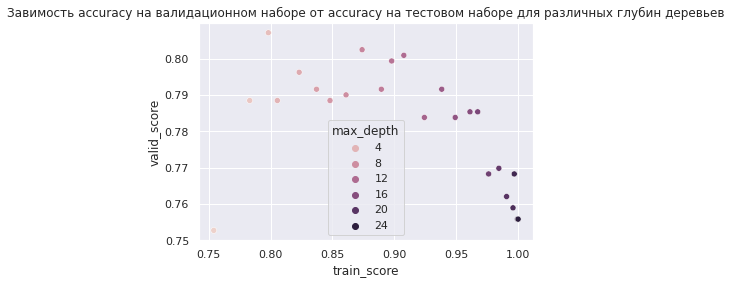

,max_depth,train_score,valid_score
2,3,0.798237,0.807154
8,9,0.873963,0.802488
11,12,0.907676,0.800933
10,11,0.897822,0.799378
4,5,0.823133,0.796267


In [5]:
tree_scores = []
for k in range(1,25):
    model = DecisionTreeClassifier(random_state=12345, max_depth=k)
    model.fit(features_train, target_train)
    cur_train_score = model.score(features_train, target_train)
    cur_valid_score = model.score(features_valid, target_valid)
    tree_scores.append([k,cur_train_score,cur_valid_score])
    print('max_depth: ',k,' Учебная выборка: {:.3f}'.format(cur_train_score),' Валидационная выборка: {:.3f}'.format(cur_valid_score))
data_tree_scores = pd.DataFrame(tree_scores, columns = ['max_depth','train_score','valid_score'])
# ax = sns.scatterplot(x="max_depth", y="valid_score",
#                      data=data_tree_scores)
# plt.title('Завимость accuracy на валидационном наборе от глубины дерева')
# plt.show()
ax = sns.scatterplot(x="train_score", y="valid_score",hue='max_depth', legend="brief",
                     data=data_tree_scores)
plt.title('Завимость accuracy на валидационном наборе от accuracy на тестовом наборе для различных глубин деревьев')
plt.show()
display(data_tree_scores.sort_values(by='valid_score', ascending = False).head(5))

### Вывод
Модель дерева решений была построена для значений гиперпараметров max_depth от 1 до 24. Как видно из полученных результатов при больших значениях max_depth дерево имеет тенденцию к переобучению, а при max_depth < 4 к недообучению. Наибольшее значение accuracy было получено для max_depth = 10.

### Случайный Лес

Теперь обучить модель случайного леса, с перебором гиперпараметров: кол-во деревьев от 10 до 80 с шагом 10, макисмальной глубиной деревьев от 1 до 24. 

In [6]:
forrest_scores = []
for estim in range(10,81, 10):
    for k in range(1,25):
        model = RandomForestClassifier(random_state=12345, n_estimators = estim, max_depth = k)
        model.fit(features_train, target_train)
        cur_train_score = model.score(features_train, target_train)
        cur_valid_score = model.score(features_valid, target_valid)
        forrest_scores.append([estim,k,cur_train_score,cur_valid_score])
data_forrest_scores = pd.DataFrame(forrest_scores, columns = ['n_estimators','max_depth','train_score','valid_score'])
display(data_forrest_scores.sort_values(by='valid_score', ascending = False).head(5))

,n_estimators,max_depth,train_score,valid_score
93,40,22,0.997407,0.835148
133,60,14,0.943983,0.833593
83,40,12,0.912344,0.833593
157,70,14,0.943465,0.833593
184,80,17,0.980809,0.833593


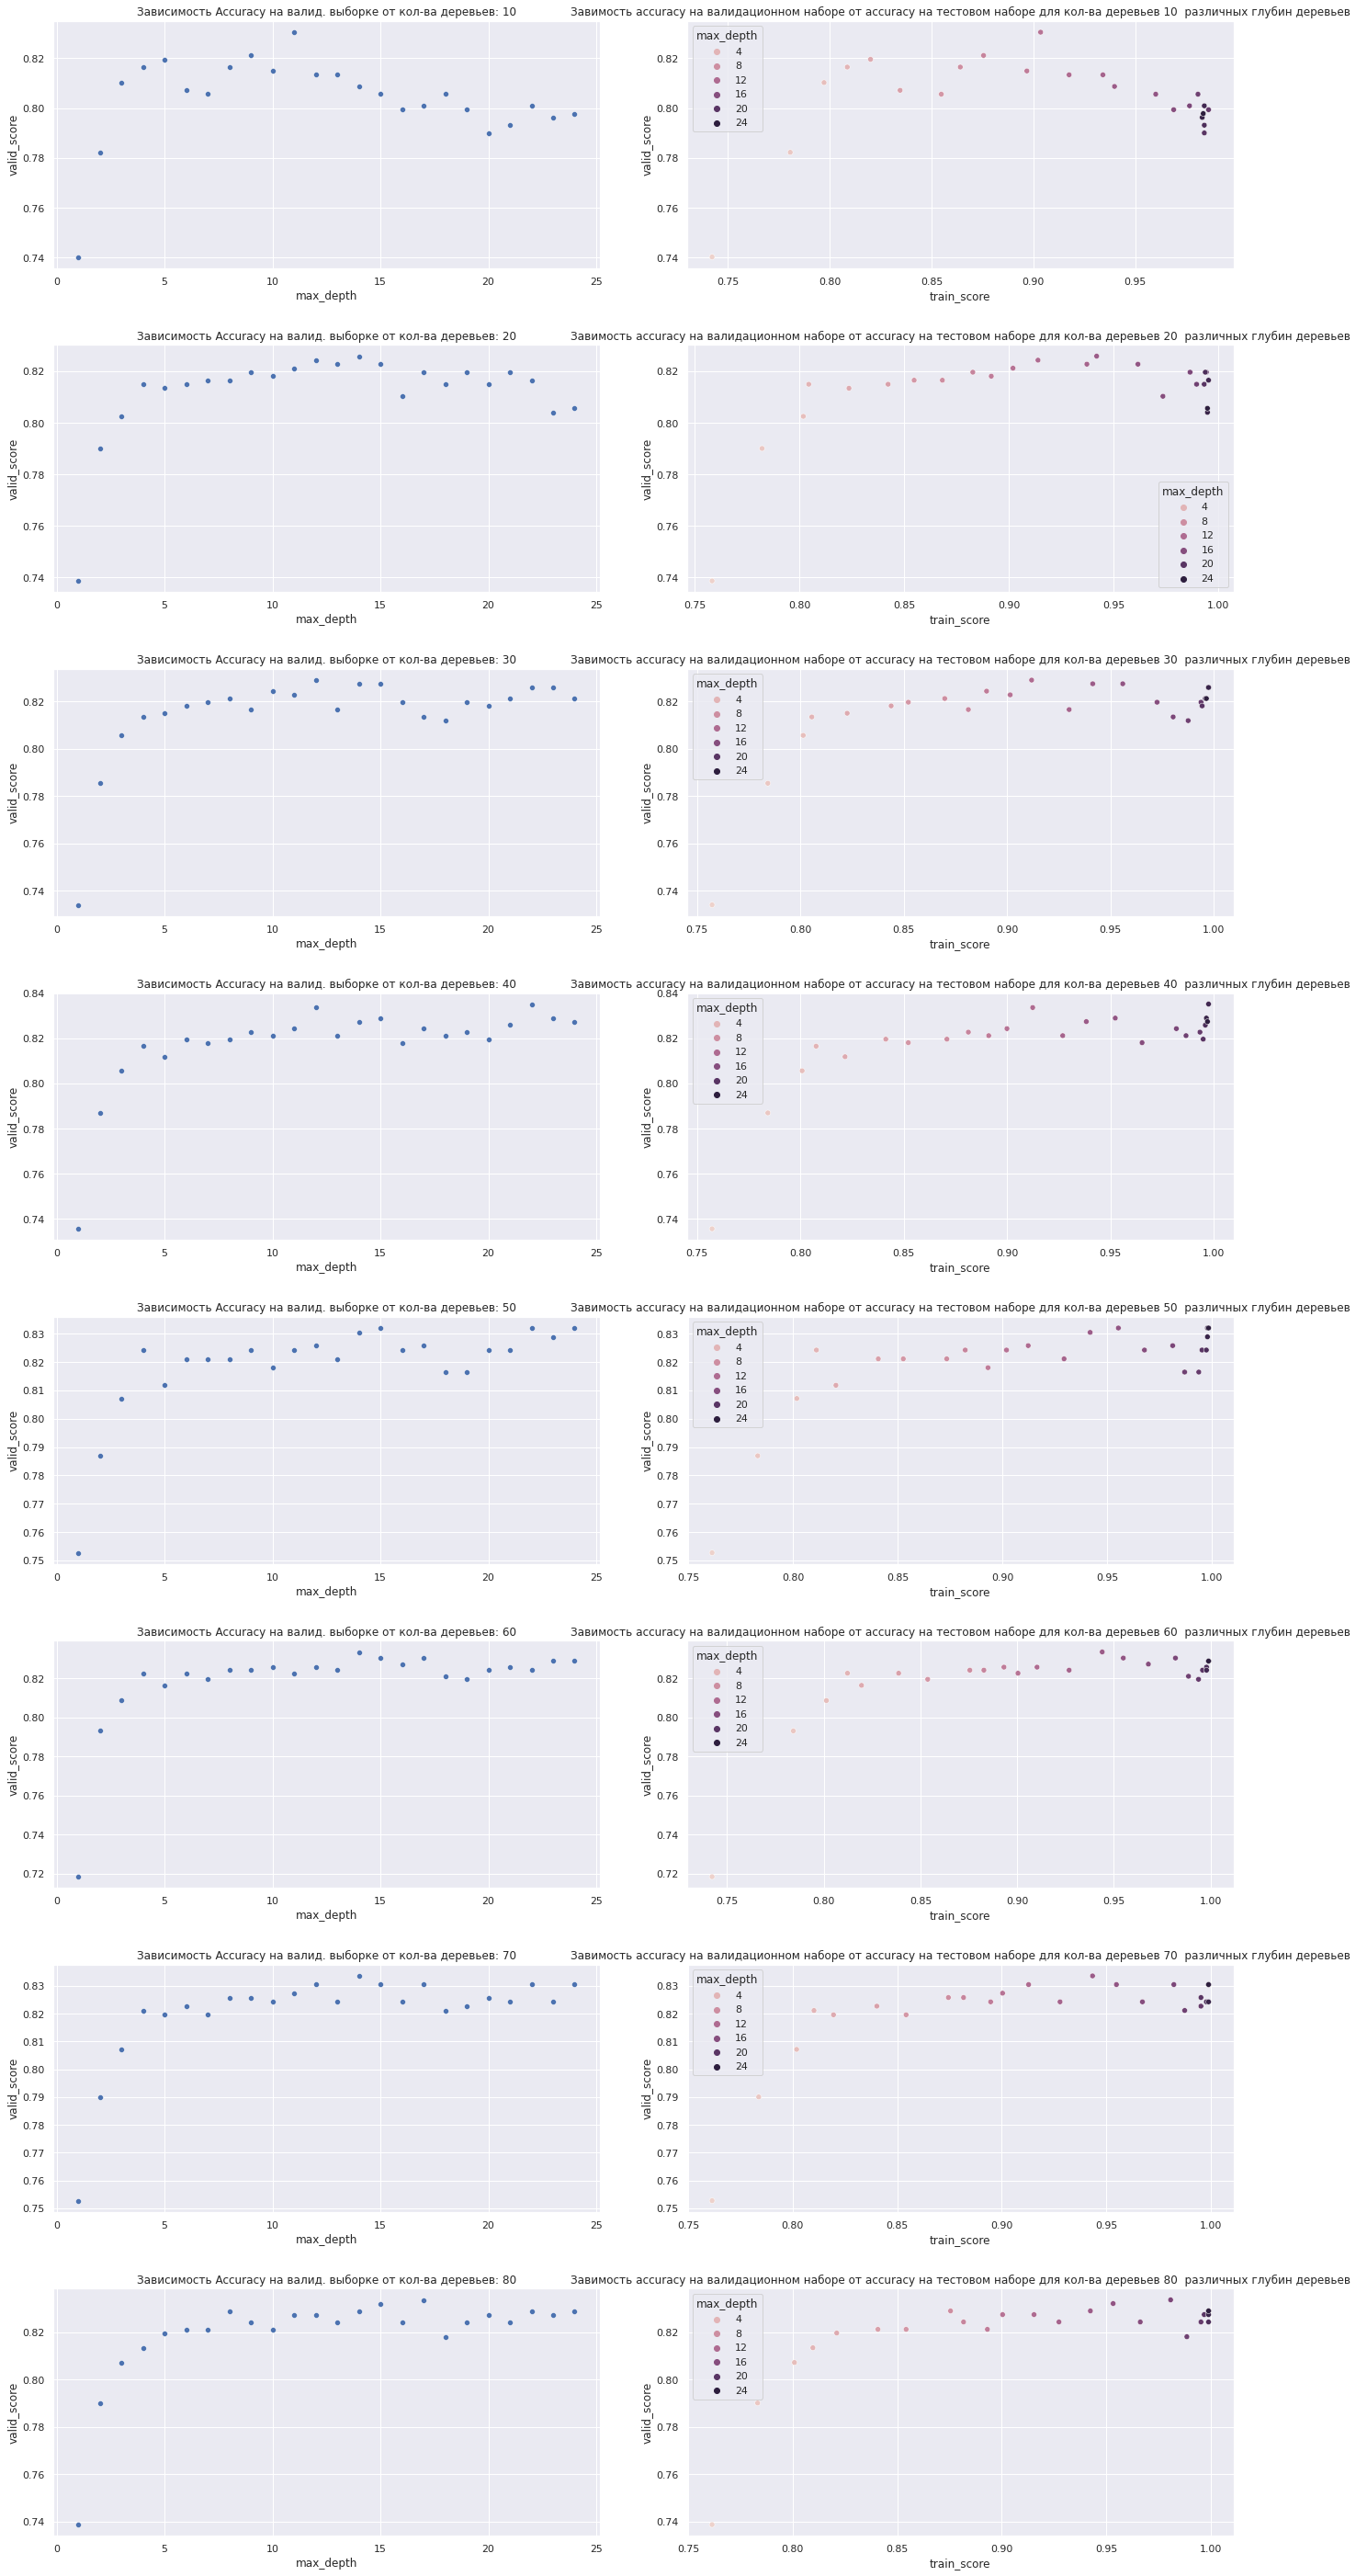

In [7]:
fig, axs = plt.subplots(8,2, figsize = (20,40))
fig.tight_layout(pad=5.0)
i = 0

for k in range(10,81, 10):
    sns.scatterplot(ax = axs[i][0], x="max_depth", y="valid_score",
                     data=data_forrest_scores[data_forrest_scores['n_estimators'] == k])
    axs[i][0].set(title = 'Зависимость Accuracy на валид. выборке от кол-ва деревьев: '+str(k))
    
    
    sns.scatterplot(ax = axs[i][1], x="train_score", y="valid_score",hue='max_depth', legend="brief",
                     data=data_forrest_scores[data_forrest_scores['n_estimators'] == k])
    axs[i][1].set(title = 'Завимость accuracy на валидационном наборе от accuracy на тестовом наборе для кол-ва деревьев '+str(k)+'  различных глубин деревьев')
    i += 1
plt.show()

In [8]:
display(data_forrest_scores.sort_values(by='valid_score', ascending = False).head(10))

,n_estimators,max_depth,train_score,valid_score
93,40,22,0.997407,0.835148
133,60,14,0.943983,0.833593
83,40,12,0.912344,0.833593
157,70,14,0.943465,0.833593
184,80,17,0.980809,0.833593
119,50,24,0.998444,0.832037
110,50,15,0.955394,0.832037
117,50,22,0.997925,0.832037
182,80,15,0.953320,0.832037
165,70,22,0.998963,0.830482


### Вывод
Модели случайного леса были построены для значений гиперпараметров: кол-во деревьев от 10 до 80 с шагом 10, глубины деревьев от 1 до 25. Аналогично модели дерева решений наблюдается переобучение при большой глубине деревьев и недообучение при малой. Зависимость от кол-ва деревьев не так очевидна, при малом кол-ве: 10, максимальное значение accuracy для валидационного набора меньше, чем для большего кол-ва деревьев, но уже начиная с 20 деревьев, максимальное значение accuracy отличается всего на ~0.005. Из полученных результатов видно, что сразу несколько моделей показали одинаковое значение accuracy на валидационной выборке. Для проверки на тестовой выборке будет выбрана модель с параметрами n_estimators = 30 и max_depth = 9. При выборе модели я руководствовался идеей, что меньшая глубина дерева соответсвует более простой модели,а значит вероятность ее переобучения меньше.  

##  Проверьте модель на тестовой выборке

Обучим модель с выбранными гиперпараметрами на расширенную учебную + валидационную выборку. И проверим обученную модель на тестовой выборке.

In [9]:
features_train_and_valid = data_train_and_valid.drop(['is_ultra'], axis=1)
target_train_and_valid = data_train_and_valid['is_ultra']

model = RandomForestClassifier(random_state=12345, n_estimators = 30, max_depth = 9)
model.fit(features_train_and_valid, target_train_and_valid)
cur_train_and_valid_score = model.score(features_train_and_valid, target_train_and_valid)
cur_test_score = model.score(features_test, target_test)
print('Учебная выборка: {:.3f}'.format(cur_train_and_valid_score),' Тестовая выборка: {:.3f}'.format(cur_test_score))

Учебная выборка: 0.878  Тестовая выборка: 0.801


### Вывод
В качестве лучшей модели выбрана модель случайного леса с параметрами, полученными в предыдущем шаге. Для проверки модели на тестовой выборке, сначала модель с выбраннами значениями параметров переобучалась на обучающей и валидационной выборках, это позволит увеличить точность модели, а затем она была проверена на тестовой выборке. Результат проверки на тестовой выборке 0.801, что решает поставленную задачу т.к. accuracy > 0.75

## (бонус) Проверьте модели на адекватность

Возьмем модель, которая будет предсказывать случайные значения из области значений таргета для исходных прризнаков.

In [10]:
model_dummy = DummyClassifier(random_state = 12345, strategy="stratified")
model_dummy.fit(features_train_and_valid,target_train_and_valid)
print('Accuracy при заполнении случайным значнием в с учетом неравномерности набора данных: {:.3f}'.format(model_dummy.score(features_test, target_test)))

Accuracy при заполнении случайным значнием в с учетом неравномерности набора данных: 0.577


### Вывод
Для проверки моделей на адеватность, accuracy моделей сравнивается с accuracy модели, которая решает задачу классификации путем заполнения значений случайными предсказаниями. В данном случае у DummyClassifier был выбран параметр strategy = "stratified", т.к. исходный набор данных не сбалансирован,т.к. пользователей не использующих тариф ultra 70%.
Accuracy полученной модели в ходе выполенения работы - 0.801, а accuracy модели, заполняющей случайными значениями - 0.577. Следовательно, полученная модель адекватна.

## Общий вывод
В ходе выполнения задания начальный набор данных был разбит на 3 выборки(обучающая, валидационная и тестовая) в соотношении 3:1:1. Далее были исследованы модели: логистической регрессии, дерева и случайного леса для решения поставленной задачи. Наибольшее значение accuracy было получено для модели случайного леса, для этого значения accuracy были выбраны гиперпараметра max_depth и n_estimators. При проверке на тестовой выборке значение accuracy - 0.801, что больше 0.75. - задача выполнена. Проверка полученной модели на вменяемость показала, что модель адекватна и работает явно лучше, чем модель, основанная на заполнении случайными значениями.